In [4]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
K.common.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam, adadelta,Nadam
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '/emotion_data'
data_dir_list = os.listdir(data_path)

img_rows=32
img_cols=32
num_channel=1
num_epoch=30

num_classes = 6



labels_name  = {'angry':0, 'fear':1, 'happy':2,'neutral':3, 'sad':4, 'surprise':5 }

img_data_list=[]
labels_list = []

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loading the images of dataset-'+'{}\n'.format(dataset))
	label = labels_name[dataset]
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(32,32))
		img_data_list.append(input_img_resize)
		labels_list.append(label)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=10)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

if num_channel==1:
	if K.common.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		

USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
	# using sklearn for preprocessing
	from sklearn import preprocessing
	
	def image_to_feature_vector(image, size=(32, 32)):
		# resize the image to a fixed size, then flatten the image into
		# a list of raw pixel intensities
		return cv2.resize(image, size).flatten()
	
	img_data_list=[]
	for dataset in data_dir_list:
		img_list=os.listdir(data_path+'/'+ dataset)
		print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
		for img in img_list:
			input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
			input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
			input_img_flatten=image_to_feature_vector(input_img,(32,32))
			img_data_list.append(input_img_flatten)
	
	img_data = np.array(img_data_list)
	img_data = img_data.astype('float32')
	print (img_data.shape)
	img_data_scaled = preprocessing.scale(img_data)
	print (img_data_scaled.shape)
	
	print (np.mean(img_data_scaled))
	print (np.std(img_data_scaled))
	
	print (img_data_scaled.mean(axis=0))
	print (img_data_scaled.std(axis=0))
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)
	
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)

if USE_SKLEARN_PREPROCESSING:
    img_data=img_data_scaled




# Defining the model
input_shape=img_data[0].shape
print("***************************")
print(input_shape)
print("***************************")

Loading the images of dataset-angry

Loading the images of dataset-fear

Loading the images of dataset-happy

Loading the images of dataset-neutral

Loading the images of dataset-sad

Loading the images of dataset-surprise

(12000, 32, 32)
(array([0, 1, 2, 3, 4, 5]), array([2000, 2000, 2000, 2000, 2000, 2000], dtype=int64))
(12000, 1, 32, 32)
***************************
(1, 32, 32)
***************************


In [6]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,32,32), data_format='channels_first'))
#model.add(Convolution2D(16, kernel_size=(3, 3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


'''
model.add(Convolution2D(32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
'''


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Dropout(0.5))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["binary_accuracy"])####ADADELTA
#model.compile(loss='categorical_crossentropy',optimizer=adam(lr=0.0001, decay=1e-6),metrics=['binary_accuracy'])


# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable


# Training
X_train = X_train.reshape(X_train.shape[0], 1 ,32 ,32)
X_test = X_test.reshape(X_test.shape[0],1,32,32)

hist = model.fit(X_train, y_train, batch_size=32, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 30, 30)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 15, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 15, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               921728    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)               

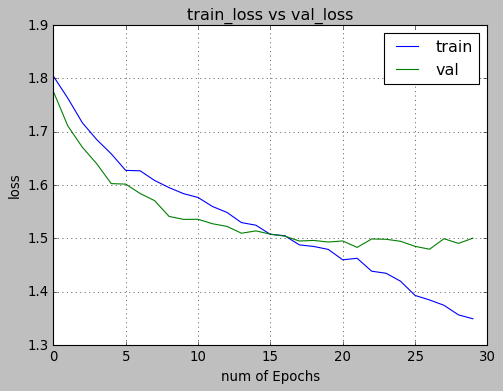

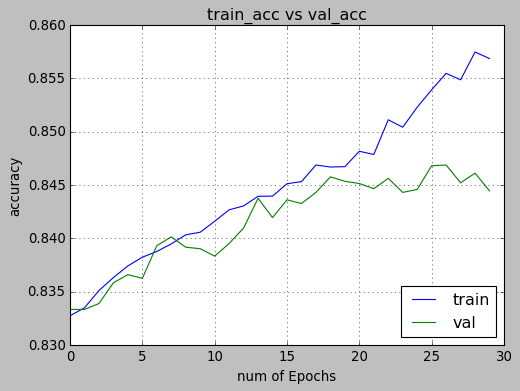

In [12]:

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['binary_accuracy']
val_acc=hist.history['val_binary_accuracy']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)#####################
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


[[0.09 0.14 0.09 0.31 0.2  0.17]
 [0.28 0.13 0.23 0.19 0.05 0.11]
 [0.1  0.18 0.06 0.28 0.19 0.19]
 ...
 [0.15 0.37 0.11 0.2  0.12 0.04]
 [0.29 0.05 0.17 0.33 0.14 0.03]
 [0.39 0.03 0.   0.18 0.31 0.09]]
[3 0 3 ... 1 3 0]
[3 0 3 ... 1 3 0]
                   precision    recall  f1-score   support

   class 0(angry)       0.32      0.29      0.30       407
    class 1(fear)       0.32      0.27      0.29       406
   class 2(happy)       0.45      0.59      0.51       376
 class 3(netural)       0.37      0.40      0.38       379
     class45(sad)       0.32      0.32      0.32       435
class 5(surprise)       0.68      0.62      0.65       397

         accuracy                           0.41      2400
        macro avg       0.41      0.41      0.41      2400
     weighted avg       0.41      0.41      0.41      2400

[[116  66  60  59  93  13]
 [ 42 110  53  63  72  66]
 [ 42  26 220  39  37  12]
 [ 56  34  61 150  61  17]
 [ 80  66  64  76 139  10]
 [ 29  43  27  21  30 247]]
Conf

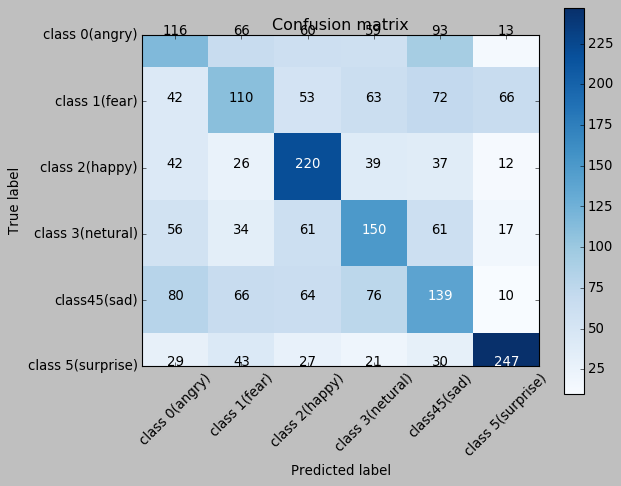

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
y_pred = model.predict_classes(X_test)
print(y_pred)
target_names = ['class 0(angry)','class 1(fear)', 'class 2(happy)','class 3(netural)', 'class45(sad)', 'class 5(surprise)'] 					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #plt.figure(1,figsize=(7,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

plt.show()


In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

#test_image = X_test[0:1]
#print (test_image.shape)

#print(model.predict(test_image))
#print(model.predict_classes(test_image))
#print(y_test[0:1])

# Testing a new image
test_image = cv2.imread('emotion_data/neutral/35.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(32,32))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print ("test shape :",test_image.shape)
   
if num_channel==1:
	if K.common.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		



lst =[0 ,1 ,2 ,3 ,4 ,5 ,6 ]

labels_name  = {'angry':0, 'fear':1, 'happy':2,'neutral':3, 'sad':4, 'surprise':5 }
name_list = list(labels_name.keys()) 
val_list = list(labels_name.values())

for pict in lst:
    if(model.predict_classes(test_image) == pict):
        print(model.predict_classes(test_image),"==========>",name_list[val_list.index(pict)]) 

     

Test Loss: 1.5003715324401856
Test accuracy: 0.8444444537162781
test shape : (32, 32)
(1, 1, 32, 32)
[5] ==========> surprise


In [16]:
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')


Saved model to disk
Loaded model from disk


In [17]:
# import save model

import cv2
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential
from keras.models import model_from_json
from keras import backend as K
K.common.set_image_dim_ordering('th')
from sklearn.metrics import classification_report,confusion_matrix
import itertools
import pyttsx3 


model = Sequential()

num_channel=1

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


loaded_model=load_model('model.hdf5')



test_image = cv2.imread('emotion_data/happy/30.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = cv2.resize(test_image,(32,32))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.common.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		

'''
Y_pred = loaded_model.predict(test_image)
print("y_pred")
print(Y_pred)
print("")
y_pred = np.argmax(Y_pred, axis=1)
print("###########")
print(y_pred)
target_names = ['class 0(angry)','class 1(fear)', 'class 2(happy)','class 3(netural)', 'class4(sad)', 'class 5(surprise)']

'''

lst =[0 ,1 ,2 ,3 ,4 ,5 ,6 ]

labels_name  = {'angry':0, 'fear':1, 'happy':2,'neutral':3, 'sad':4, 'surprise':5 }
name_list = list(labels_name.keys()) 
val_list = list(labels_name.values())

for pict in lst:
    if(loaded_model.predict_classes(test_image) == pict):
        print(loaded_model.predict_classes(test_image),"==========>",name_list[val_list.index(pict)]) 




Loaded model from disk
(32, 32)
(1, 1, 32, 32)
[2] ==========> happy


In [18]:
import cv2

faceCascade = cv2.CascadeClassifier('C:/Users/asus/Anaconda3/envs/py37/lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')
video_capture = cv2.VideoCapture(0)

name = ['angry', 'fear', 'happy', 'neutral', 'sad',  'surprise']

while True:

    ret, frame = video_capture.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if ret == True:

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            faces = faceCascade.detectMultiScale(
                gray,
                scaleFactor=1.3,
                minNeighbors=4,
                minSize=(10, 10),  #  size of face  (move far the size of face decreases)
                flags=cv2.CASCADE_SCALE_IMAGE
            )

            # Draw a rectangle around the faces
            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y-40), (x+w, y+h+10), (255, 0, 0), 2)
                roi_gray_frame = gray_frame[y:y + h, x:x + w]
                img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (32, 32)),0), 0)    
                emotion_pre = loaded_model.predict(img)
                emotion_index = int(np.argmax(emotion_pre))
                print("main index = ",emotion_index)
                '''
                ############################################ for voice ####
                converter = pyttsx3.init() 
                #voice_id = "KEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_DAVID_11.0"
                voice_id = "HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Speech\Voices\Tokens\TTS_MS_EN-US_ZIRA_11.0"  
                converter.setProperty('voice', voice_id) 
                converter.setProperty('rate', 200) 
                converter.setProperty('volume', 1)  # 0 - 1
                converter.say(name[emotion_index]) 
                converter.runAndWait() 
                ###########################################################
                '''
                cv2.putText(frame, name[emotion_index], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2, cv2.LINE_AA)
                
            # Display the resulting frame
            cv2.imshow('Video', frame)
            count =  0

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()


main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main ind

main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main ind

main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main ind

main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  5
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  5
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main ind

main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  1
main index =  1
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  1
main index =  1
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  1
main index =  5
main index =  2
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main ind

main index =  1
main index =  1
main index =  1
main index =  5
main index =  5
main index =  1
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  1
main index =  5
main index =  1
main index =  5
main index =  1
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  1
main index =  1
main index =  5
main index =  5
main index =  5
main index =  1
main index =  5
main index =  1
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  1
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main index =  5
main ind

main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main ind

main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  5
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  5
main index =  1
main index =  1
main index =  5
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  5
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  2
main index =  2
main ind

main index =  1
main index =  1
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  1
main index =  1
main index =  1
main index =  1
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  1
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main ind

main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  2
main index =  1
main index =  1
main index =  1
main index =  1
main index =  2
main index =  2
main index =  1
main index =  1
main index =  2
main index =  1
main index =  2
main index =  1
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  2
main index =  1
main index =  2
main index =  2
main index =  2
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main ind

main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  5
main index =  1
main index =  1
main index =  1
main index =  5
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  5
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main index =  1
main ind